## Parte I – Resolvendo um Problema Linearmente Separável

## Alunos: Santiago Augusto de Souza Monteiro - 1915080043

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Perceptron import Perceptron

vetor de pesos:  [-0.4185301   0.0669601  -0.01687416]
Época: 1 
Número de ajustes feitos no vetor de pesos na época: 48
Número de ajustes feitos no vetor de pesos até o momento: 48

Época: 2 
Número de ajustes feitos no vetor de pesos na época: 11
Número de ajustes feitos no vetor de pesos até o momento: 59

Época: 3 
Número de ajustes feitos no vetor de pesos na época: 0
Número de ajustes feitos no vetor de pesos até o momento: 59

O número total de ajustes no vetor de pesos:  59
número de épocas até a convergência:  3
vetor de pesos final:  [  -0.5185301   312.4707101  -311.66697416]


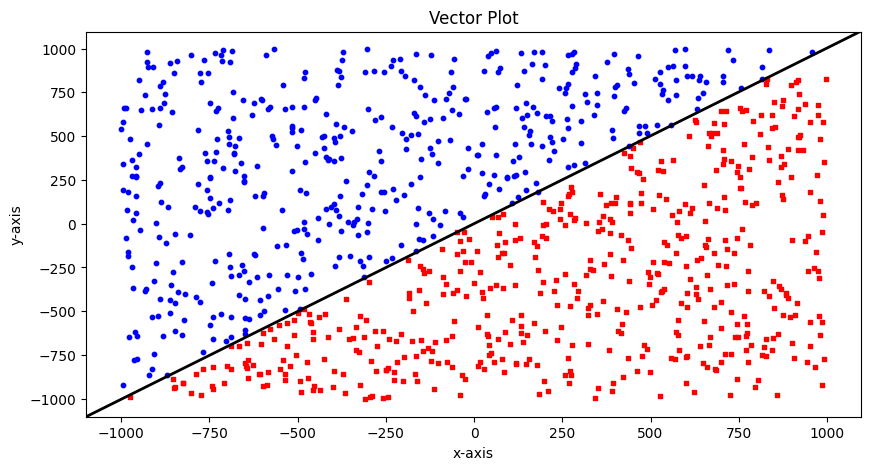

In [2]:
data = np.fromfile("data/dataAll.txt").reshape(1000, 3)
neuron = Perceptron(data, len(data))
neuron.teachPerceptron()